## Testing Q-Learning in a grid

Testing a basic Q-learning implementation on a 10×10 grid environment, agent starts at the top-left corner and aims to reach the bottom-right goal.  

The grid contains:
- Normal cells (-0.1 reward)
- Obstacles (rocks) (-1)
- A goal cell(10)

**Hyperparameters:**
- Learning rate (α): 0.1  
- Discount factor (γ): 0.9  
- Exploration probability (ε): 0.1



In [2]:
import numpy as np

# ----- Grid setup -----
n = 10
grid = np.zeros((n, n), dtype=int)
# Add rocks (# = 1)
rocks = [
    (1, 1), (1, 2), (1, 3),
    (2, 3), (2, 7),
    (3, 0), (3, 5), (3, 6),
    (4, 2), (4, 8),
    (5, 4), (5, 5),
    (6, 1), (6, 7),
    (7, 3), (7, 8),
    (8, 5),
    (9, 2)
]

for r, c in rocks:
    grid[r, c] = 1
    
start = (0, 0)
goal = (n-1, n-1)
pos = start  # agent position

# ----- Actions -----
actions = {
    0: (-1, 0),  # up
    1: (1, 0),   # down
    2: (0, -1),  # left
    3: (0, 1)    # right
}

# ----- Environment functions -----
def reset():
    global pos
    pos = start
    return pos

def step(action):
    """Take action, return (next_state, reward, done)."""
    global pos
    move = actions[action]
    new_pos = (pos[0] + move[0], pos[1] + move[1])

    # Out of bounds
    if not (0 <= new_pos[0] < n and 0 <= new_pos[1] < n):
        return pos, -1, False

    # Rock
    if grid[new_pos] == 1:
        return pos, -1, False

    # Valid move
    pos = new_pos

    # Check goal
    if pos == goal:
        return pos, 10, True
    else:
        return pos, -0.1, False

def render():
    """Print current grid."""
    grid_disp = np.array(grid, dtype=str)
    grid_disp[grid == 0] = '.'
    grid_disp[grid == 1] = '#'
    gx, gy = goal
    px, py = pos
    grid_disp[gx, gy] = 'G'
    grid_disp[px, py] = 'A'
    print("\n".join(" ".join(row) for row in grid_disp))
    print()


Run 1: converged at episode 213
Run 2: converged at episode 175
Run 3: converged at episode 231
Run 4: converged at episode 176
Run 5: converged at episode 197
Run 6: converged at episode 209
Run 7: converged at episode 198
Run 8: converged at episode 193
Run 9: converged at episode 204
Run 10: converged at episode 197

Average convergence episode over 10 runs: 199.30


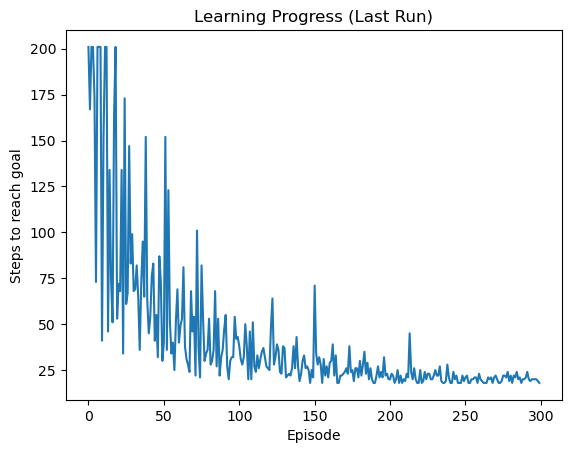

In [3]:
import random
import matplotlib.pyplot as plt
import numpy as np

# ----- Agent & Q-learning setup -----
Q = {}
for i in range(n):
    for j in range(n):
        Q[(i, j)] = [0.0 for _ in range(4)]

alpha = 0.1
gamma = 0.9
epsilon = 0.1
episodes = 300

steps_per_episode = []

# ----- Single run -----
def q_learning():
    consecutive_success = 0
    converged_episode = None

    for ep in range(episodes):
        state = reset()
        done = False
        steps = 0

        while not done:
            if random.random() < epsilon:
                action = random.choice(range(4))
            else:
                action = int(np.argmax(Q[state]))

            next_state, reward, done = step(action)
            best_next = np.max(Q[next_state])
            Q[state][action] += alpha * (reward + gamma * best_next - Q[state][action])
            state = next_state
            steps += 1

            if steps > 200:
                break

        steps_per_episode.append(steps)

        if done and steps <= 25:
            consecutive_success += 1
        else:
            consecutive_success = 0

        if consecutive_success == 10 and converged_episode is None:
            converged_episode = ep - 9

    return converged_episode if converged_episode else episodes

# ----- Run multiple trials -----
runs = 10
convergence_episodes = []

for r in range(runs):
    # reset Q-table each run
    for i in range(n):
        for j in range(n):
            Q[(i, j)] = [0.0 for _ in range(4)]
    steps_per_episode = []
    conv = q_learning()
    convergence_episodes.append(conv)
    print(f"Run {r+1}: converged at episode {conv}")

avg_conv = np.mean(convergence_episodes)
print(f"\nAverage convergence episode over {runs} runs: {avg_conv:.2f}")

# ----- Plot from last run -----
plt.plot(steps_per_episode)
plt.xlabel('Episode')
plt.ylabel('Steps to reach goal')
plt.title('Learning Progress (Last Run)')
plt.show()


In [4]:
# ----- Testing the trained agent -----
def test_agent(max_steps=50):
    state = reset()
    done = False
    path = [state]

    for _ in range(max_steps):
        action = int(np.argmax(Q[state]))  # always greedy
        next_state, reward, done = step(action)
        path.append(next_state)
        if done:
            break
        state = next_state

    # Display path visually
    print("\nFinal path followed by agent:\n")
    for step_pos in path:
        gx, gy = goal
        grid_disp = np.array(grid, dtype=str)
        grid_disp[grid == 0] = '.'
        grid_disp[grid == 1] = '#'
        grid_disp[gx, gy] = 'G'
        for (x, y) in path:
            grid_disp[x, y] = '*'
        grid_disp[start] = 'S'
        grid_disp[goal] = 'G'
    print("\n".join(" ".join(row) for row in grid_disp))
    print(f"\nReached goal in {len(path)} steps!" if done else "\nDid not reach goal.")

# ----- Run training and testing -----
test_agent()



Final path followed by agent:

S * * * * * . . . .
. # # # . * * * * *
. . . # . . . # . *
# . . . . # # . . *
. . # . . . . . # *
. . . . # # . . . *
. # . . . . . # . *
. . . # . . . . # *
. . . . . # . . . *
. . # . . . . . . G

Reached goal in 19 steps!


**Analysis that can be done**

*in a learning algorithm:*

different reward systems<br>different hyperparametrs

*across different learning algorithms:*

for each type, no. of episodes taken to converge, 